In [31]:
import numpy as np
from gym_ras.tool.common import getT, TxT, invT
import matplotlib.pyplot as plt

In [32]:
def sym_mirror(traj_Ts, mirror_rot, mirror_dis_scale, z_scale=1, mirror_rot_decay=0):
    originT = traj_Ts[0]
    traj_Ts_origin = [TxT([invT(originT), T]) for T in traj_Ts] # trajectory w.r.t. origin frame
    Ts = []
    for i, _T in enumerate(traj_Ts_origin):
        T = _T.copy()
        T[0,3] = T[0,3] *  mirror_dis_scale
        T[1,3] = T[1,3] *  mirror_dis_scale
        T[2,3] = T[2,3] *  z_scale
        T = TxT([getT([0,0,0,], [0,0,mirror_rot+(i*mirror_rot_decay)],rot_type='euler',euler_Degrees=True),T,]) # trajectory w.r.t. origin frame
        T = TxT([originT, T]) # trajectory w.r.t. wolrd frame
        Ts.append(T)
    return Ts

In [33]:
def plotline(ax, Ts, color='gray', legend_txt=None,alpha=0.4,linewidth=1):
    T2P = lambda x, dim: x[dim,3] # only visualize position
    if legend_txt == None:
        ax.plot3D([T2P(T,0) for T in Ts], [T2P(T,1) for T in Ts], [T2P(T,2) for T in Ts], color,alpha=alpha,linewidth=linewidth)
    else:
        ax.plot3D([T2P(T,0) for T in Ts], [T2P(T,1) for T in Ts], [T2P(T,2) for T in Ts], color,label=legend_txt,alpha=alpha,linewidth=linewidth)


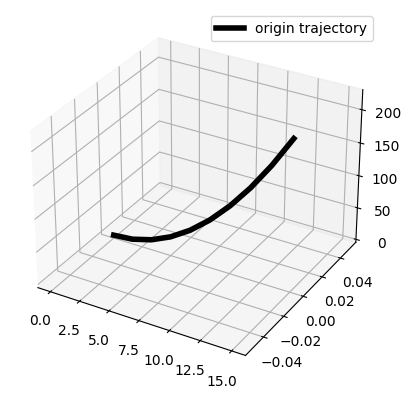

In [34]:
traj_num = 10
num_rots = 100
num_dis_scale = 4
colors = ['b','g','r','c','m','y']
xline =  np.linspace(0, 15, traj_num)
yline =  np.linspace(0, 0, traj_num)
zline = np.square(xline) + np.square(yline)
traj_Ts = [getT([xline[i],yline[i],zline[i],], [0,0,0,], rot_type="euler")for i in range(xline.shape[0])]
fig = plt.figure()
ax = plt.axes(projection='3d')
plotline(ax, traj_Ts, color='k', legend_txt="origin trajectory",linewidth=4, alpha=1)
plt.legend(loc="best")

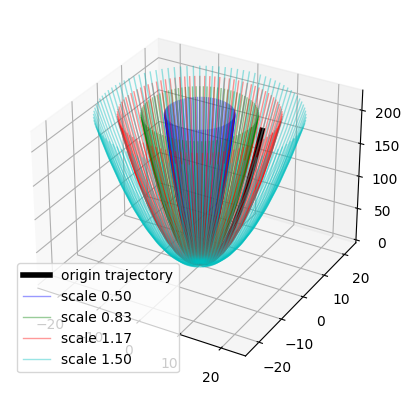

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plotline(ax, traj_Ts, color='k', legend_txt="origin trajectory",linewidth=4, alpha=1)


mirror_dis_scales = np.linspace(0.5,1.5, num_dis_scale).tolist()
mirror_rots = np.linspace(0,360, num_rots).tolist()
for j, mirror_dis_scale in enumerate(mirror_dis_scales):
    is_first = True
    for mirror_rot in mirror_rots:
        mirror_T = sym_mirror(traj_Ts, mirror_rot=mirror_rot,mirror_dis_scale=mirror_dis_scale)
        plotline(ax, mirror_T, color=colors[j], legend_txt="scale {:.2f}".format(mirror_dis_scale) if is_first else None)
        is_first = False
plt.legend(loc="best")
plt.show()
    

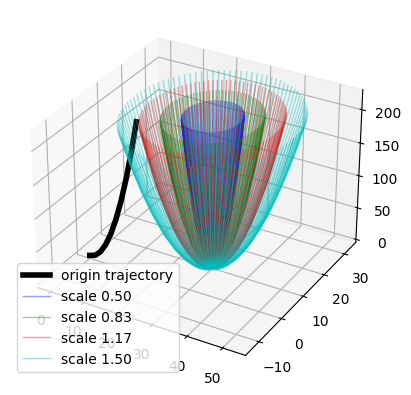

In [36]:
translation = getT([30,10,0], [0,0,0,], rot_type="euler")
traj_Ts_1 = [TxT([translation, _T ]) for _T in traj_Ts]


fig = plt.figure()
ax = plt.axes(projection='3d')
plotline(ax, traj_Ts, color='k', legend_txt="origin trajectory",linewidth=4, alpha=1)


mirror_dis_scales = np.linspace(0.5,1.5, num_dis_scale).tolist()
mirror_rots = np.linspace(0,360, num_rots).tolist()
for j, mirror_dis_scale in enumerate(mirror_dis_scales):
    is_first = True
    for mirror_rot in mirror_rots:
        mirror_T = sym_mirror(traj_Ts_1, mirror_rot=mirror_rot,mirror_dis_scale=mirror_dis_scale)
        plotline(ax, mirror_T, color=colors[j], legend_txt="scale {:.2f}".format(mirror_dis_scale) if is_first else None)
        is_first = False
plt.legend(loc="best")
plt.show()

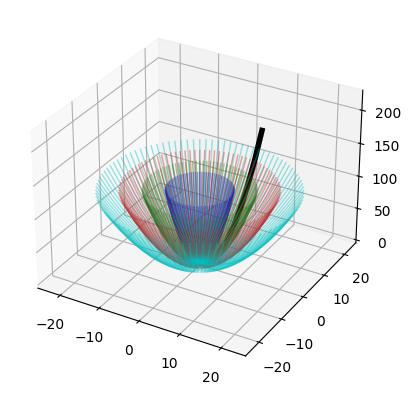

In [37]:
z_scale = 0.5
fig = plt.figure()
ax = plt.axes(projection='3d')
plotline(ax, traj_Ts, color='k', legend_txt="origin trajectory",linewidth=4, alpha=1)


mirror_dis_scales = np.linspace(0.5,1.5, num_dis_scale).tolist()
mirror_rots = np.linspace(0,360, num_rots).tolist()
for j, mirror_dis_scale in enumerate(mirror_dis_scales):
    is_first = True
    for mirror_rot in mirror_rots:
        mirror_T = sym_mirror(traj_Ts, mirror_rot=mirror_rot,mirror_dis_scale=mirror_dis_scale,z_scale=z_scale)
        plotline(ax, mirror_T, color=colors[j], legend_txt="scale {:.2f}".format(mirror_dis_scale) if is_first else None)
        is_first = False
# plt.legend(loc="best")
plt.show()

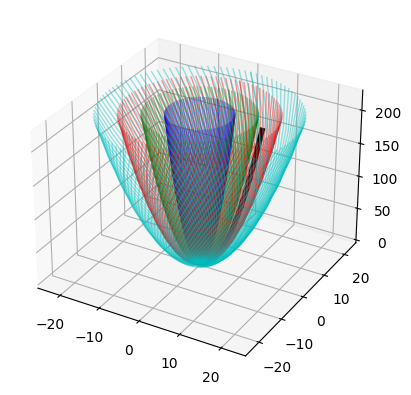

In [42]:
rot_decay = 10
fig = plt.figure()
ax = plt.axes(projection='3d')
plotline(ax, traj_Ts, color='k', legend_txt="origin trajectory",linewidth=4, alpha=1)


mirror_dis_scales = np.linspace(0.5,1.5, num_dis_scale).tolist()
mirror_rots = np.linspace(0,360, num_rots).tolist()
for j, mirror_dis_scale in enumerate(mirror_dis_scales):
    is_first = True
    for mirror_rot in mirror_rots:
        mirror_T = sym_mirror(traj_Ts, mirror_rot=mirror_rot,mirror_dis_scale=mirror_dis_scale,z_scale=1, mirror_rot_decay=rot_decay)
        plotline(ax, mirror_T, color=colors[j], legend_txt="scale {:.2f}".format(mirror_dis_scale) if is_first else None)
        is_first = False
# plt.legend(loc="best")
plt.show()